# **Anna Rafaela Silva Ferreira**

[Currículo Lattes](https://lattes.cnpq.br/4481159249601215)

E-mail: rafaela.anna@gmail.com

# 1. Configuração Inicial do programa

## 1.1 - Importando as bibliotecas

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1.2 - Criando diretórios de armazenamento a serem utilizados ao longo do código

In [2]:
FIG_PATH = './figures'
os.makedirs(FIG_PATH, exist_ok=True)

## 1.3 - Função para salvar as figuras em um diretório

In [3]:
def export_plot(fig_name, adjust_spacing=True, extension='png', resolution=300):
    path = os.path.join(FIG_PATH, fig_name + '.' + extension)
    print('Exporting figure', fig_name)
    if adjust_spacing:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

# 2. Análise Exploratória dos Dados

Neste momento, iremos identidicar os dados de uma forma geral, entender cada atributo, verificar correlações, criar hipóteses a partir dessas correlações

## 2.1 - Obtenção dos dados

Nesse tópico iremos:
*   obter os dados,
*   verificar o tipo de dado em cada atributo,
*   verificar quantos valores nulos em cada atributo,
*   verificar atributos pertinentes ao problema.

In [4]:
raw_data = pd.read_csv('teste_indicium_precificacao.csv')
raw_data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
raw_data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
print(f'Tamanho dos dados: {raw_data.shape}\n')
print(f'Tipo de dados em cada atributo e quantidade de instancias nulas em cada atributo:\n')
raw_data.info()

Tamanho dos dados: (48894, 16)

Tipo de dados em cada atributo e quantidade de instancias nulas em cada atributo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int6

In [7]:
print('Quantidade de valores nulos por atributo\n')
print(f'{'Atributo':<35} {'Valores Nulos':<15} {'Tipo de Dado':<10}')
print('-' * 70)

for atribute in raw_data:
    nulos = raw_data[atribute].isnull().sum()
    tipo = str(raw_data[atribute].dtypes)
    print(f'{atribute:<35} {nulos:<15} {tipo:<10}')

Quantidade de valores nulos por atributo

Atributo                            Valores Nulos   Tipo de Dado
----------------------------------------------------------------------
id                                  0               int64     
nome                                16              object    
host_id                             0               int64     
host_name                           21              object    
bairro_group                        0               object    
bairro                              0               object    
latitude                            0               float64   
longitude                           0               float64   
room_type                           0               object    
price                               0               int64     
minimo_noites                       0               int64     
numero_de_reviews                   0               int64     
ultima_review                       10052           object    
rev

Pode-se observar dos dados acima que faltam alguns valores em alguns atributos. Por exemplo, o atributo 'nome' possui 16 instâncias nulas.

Entretanto, esse atributo, bem como o atributo 'host_name' podem ser excluidos dos dados a serem analisados devido à sensibilidade de seus dados, que podem identificar o proprietário do imóvel, podendo ter problemas posteriores para a empresa. Dessa forma, serão excluidos dos dados a serem analisados a partir daqui.

Outro atributo que pode ser descartado é 'ultima_review', já que o essa informação é, com base de conhecimentos e experiências atual da autora, insignificante para influir no preço de aluguel imóveis. (Não quer dizer que não influencia na escolha do usuário). Além de que os atributos 'numeros_de_reviews' e 'reviews_por_mes' são mais esclarecedores.

In [8]:
raw_data.drop('nome', axis=1, inplace=True)
raw_data.drop('host_name', axis=1, inplace=True)
raw_data.drop('ultima_review', axis=1, inplace=True)

In [9]:
print('Quantidade de valores nulos por atributo\n')
print(f'{'Atributo':<35} {'Valores Nulos':<15} {'Tipo de Dado':<10}')
print('-' * 70)

for atribute in raw_data:
    nulos = raw_data[atribute].isnull().sum()
    tipo = str(raw_data[atribute].dtypes)
    print(f'{atribute:<35} {nulos:<15} {tipo:<10}')

Quantidade de valores nulos por atributo

Atributo                            Valores Nulos   Tipo de Dado
----------------------------------------------------------------------
id                                  0               int64     
host_id                             0               int64     
bairro_group                        0               object    
bairro                              0               object    
latitude                            0               float64   
longitude                           0               float64   
room_type                           0               object    
price                               0               int64     
minimo_noites                       0               int64     
numero_de_reviews                   0               int64     
reviews_por_mes                     10052           float64   
calculado_host_listings_count       0               int64     
disponibilidade_365                 0               int64     


In [10]:
raw_data.head()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
2,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
3,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


## 2.2 - Obtenção do conjunto de treinamento e teste

Antes de qualquer tipo de análise, é necessário a criação do conjunto de treinamento e de teste do modelo.

A porcentagem de amostra do conjunto de treinamento é de 20% (<span style='color:red'>INSERIR UMA OU DUAS REFERÊNCIAS JUSTIFICANDO ESSE TAMANHO</span>)

Para repetibilidade dos dados, configurou-se uma constante para a semente de aleatoriedade.

Como, de acordo com o desafio entregue, o atributo 'id' possui um valor exclusivo para cada instância, supõe-se também que se novas instâncias forem inseridas, terão também 'id''s exclusivos. Dessa forma, não é necessário criar um identificador único (hash) para o conjunto de treino e teste.

In [11]:
train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=42)
train_data.head()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
38522,30311099,220734035,Brooklyn,Williamsburg,40.70209,-73.94223,Private room,60,3,0,NaN,1,0
21985,17684277,119737270,Brooklyn,Flatbush,40.63865,-73.95786,Private room,65,2,0,NaN,2,0
31180,24208760,56905821,Manhattan,Upper West Side,40.77959,-73.97827,Private room,180,2,29,1.96,1,0
47176,35616292,257879526,Brooklyn,East Flatbush,40.65982,-73.93468,Private room,54,2,0,NaN,2,336
7275,5345293,27700855,Brooklyn,Brooklyn Heights,40.69165,-73.99764,Entire home/apt,300,2,62,1.19,1,274


## 2.3 - Visualização geral dos dados

Nesta seção os dados serão analisados de uma forma geral (ainda em cima dos dados brutos) e será feito também a estratificação dos dados.

Exporting figure histogram_data


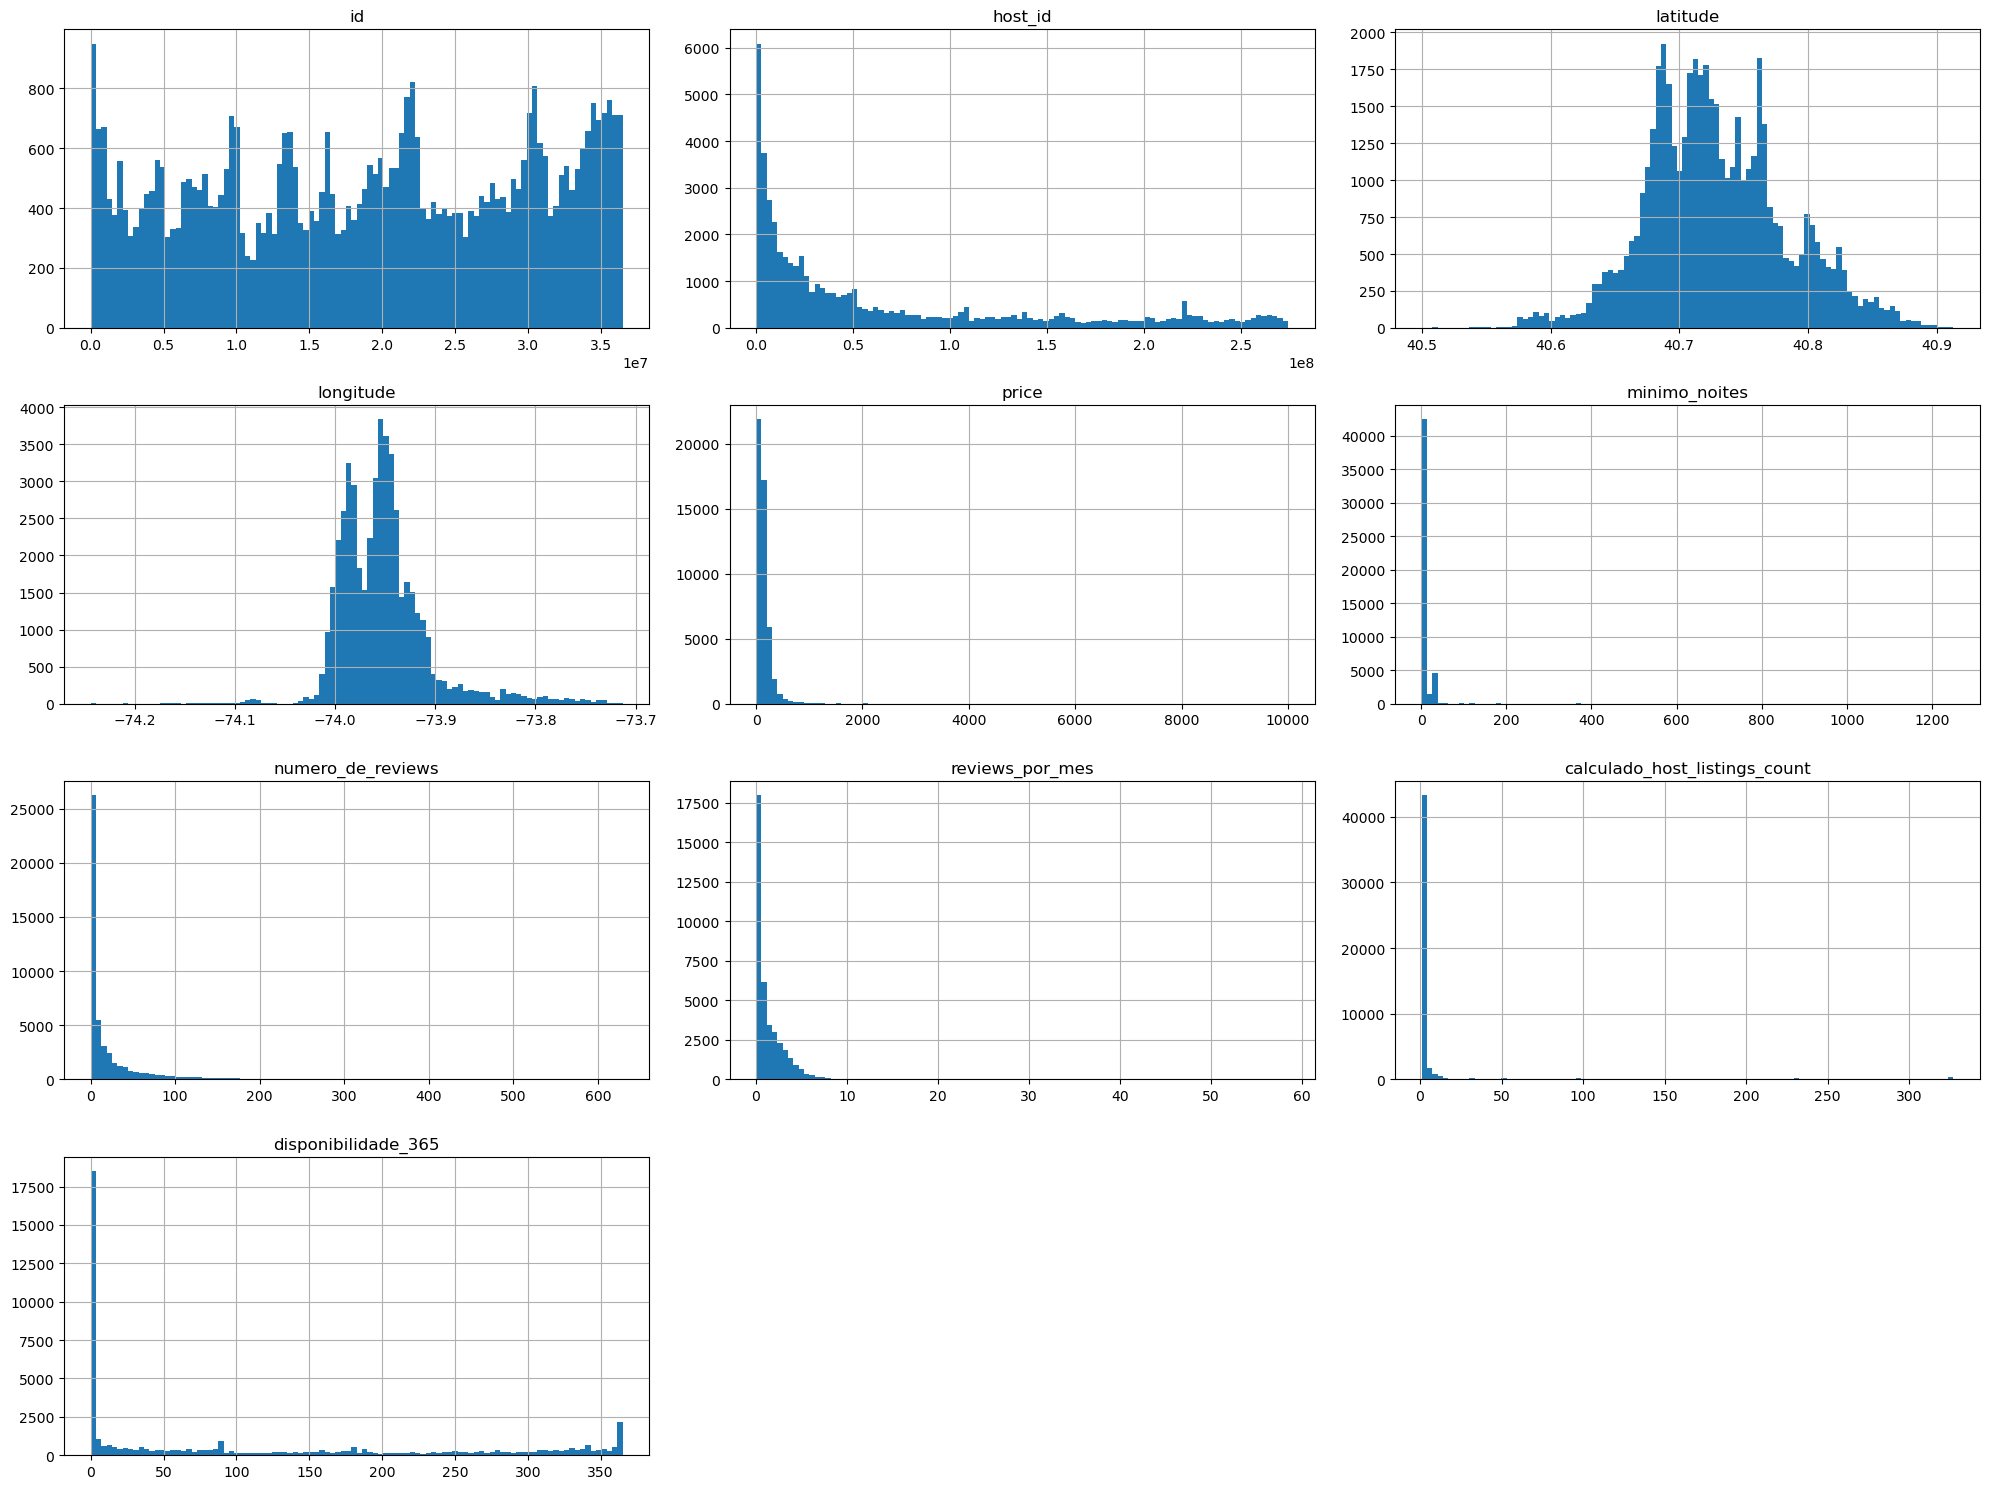

In [12]:
raw_data.hist(bins=100,figsize=(20,15))
export_plot('histogram_data')
# plt.show()

In [13]:
print('Média:', np.mean(raw_data['minimo_noites']))
print('Mediana:', np.median(raw_data['minimo_noites']))

print('Média:', np.mean(raw_data['numero_de_reviews']))
print('Mediana:', np.median(raw_data['numero_de_reviews']))

Média: 7.030085491062298
Mediana: 3.0
Média: 23.27475763897411
Mediana: 5.0


A partir dos gráficos e das médias e medianas, observa-se que a maioria dos atributos possuem distribuição assimétrica a direita.

Observa-se também que a escala é desproporcional entre os atributos, principalmente em relação ao atributo 'price', o que pode levar à baixa qualidade do modelo de previsão. Com isso, deixa-se em aberto se deve utilizar o logaritmo para futuras análises.

## 2.4 - Estratificação dos dados

Será feito agora a estratificação dos dados a partir do atributo 'price'.

Será testado qual tipo de estratificação mais se adequa ao problema. Se dividiremos os dados em intervalos de tamanho fixo ou intervalos não fixos.

<Axes: >

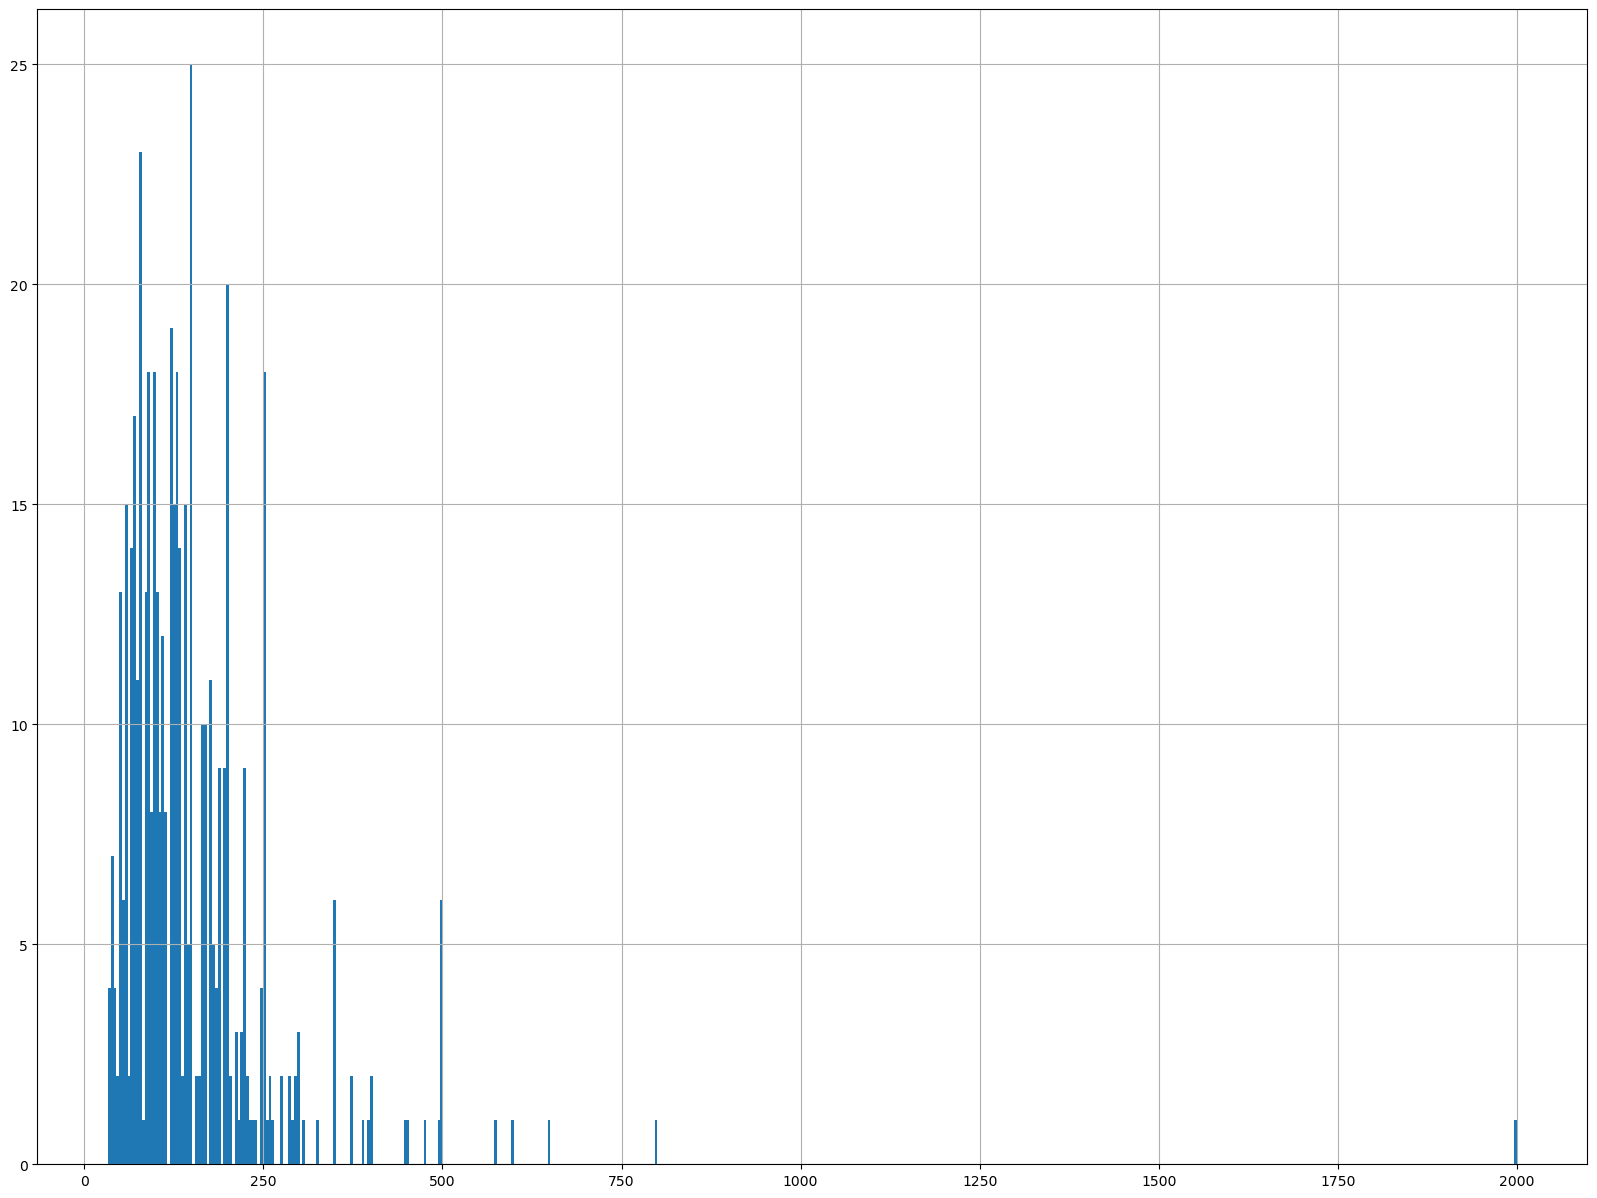

In [14]:
raw_data['price'].head(500).hist(bins=500, figsize=(20,15))

price_cat
2    17367
3    10028
4     6554
1     6550
7     3357
5     3176
6     1851
Name: count, dtype: int64


q_price_cat
2    8229
4    7767
1    7018
7    6979
6    6940
5    6210
3    5751
Name: count, dtype: int64

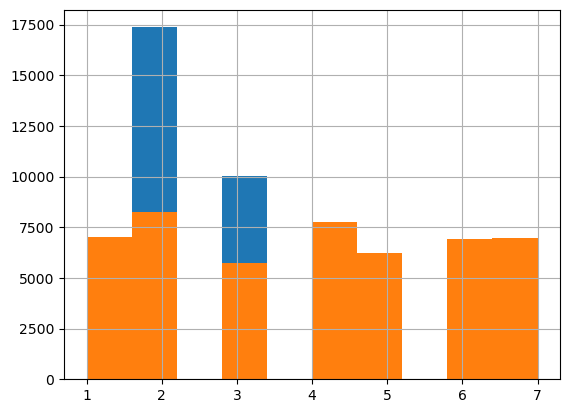

In [15]:
raw_data['price_cat'] = pd.cut(raw_data['price'],
                               bins=[0., 50., 100., 150., 200., 250., 300., np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])

raw_data['price_cat'].hist()
# plt.show()
print(raw_data['price_cat'].value_counts())

raw_data['q_price_cat'] = pd.qcut(raw_data['price'],
                               q = 7,
                               labels=[1, 2, 3, 4, 5, 6, 7])

raw_data['q_price_cat'].hist()
# plt.show()
raw_data['q_price_cat'].value_counts()

In [16]:
missing_prices = raw_data['price_cat'].isnull().sum()
print(missing_prices)

missing_prices = raw_data['q_price_cat'].isnull().sum()
print(missing_prices)

11
0


Observa-se acima que a função pd.qcut se adequou ao problema por não gerar nenhum valor nulo no conjunto de dados estratificados.

Agora, precisa-se também criar daos de treino e teste estratificados de acordo com os valores estratificados do atributo 'price'.
Assim, nossos novos conjuntos de dados para treinamento e teste serão:
*   strat_train_data
*   strat_test_data

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39115 entries, 38522 to 15795
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39115 non-null  int64  
 1   host_id                        39115 non-null  int64  
 2   bairro_group                   39115 non-null  object 
 3   bairro                         39115 non-null  object 
 4   latitude                       39115 non-null  float64
 5   longitude                      39115 non-null  float64
 6   room_type                      39115 non-null  object 
 7   price                          39115 non-null  int64  
 8   minimo_noites                  39115 non-null  int64  
 9   numero_de_reviews              39115 non-null  int64  
 10  reviews_por_mes                31045 non-null  float64
 11  calculado_host_listings_count  39115 non-null  int64  
 12  disponibilidade_365            39115 non-null  

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(raw_data, raw_data['q_price_cat']):
    strat_train_data = raw_data.loc[train_index]
    strat_test_data = raw_data.loc[test_index]

Comparação da proporção dos estratos gerados do atributo 'q_price_cat' em dados gerais, estratificados e aleatórios.

In [19]:
def price_cat_proportions(data):
    return data['q_price_cat'].value_counts() / len(data)

train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': price_cat_proportions(raw_data),
    'Stratified': price_cat_proportions(strat_test_data),
    'Random': price_cat_proportions(test_set),
}).sort_index()
compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
q_price_cat,,,,,
1,0.143535,0.143573,0.144800,0.881379,0.026452
2,0.168303,0.168320,0.170570,1.346815,0.010107
3,0.117622,0.117599,0.114122,-2.975380,-0.019433
4,0.158854,0.158810,0.156662,-1.379640,-0.027795
5,0.127009,0.127007,0.134063,5.553397,-0.002045
6,0.141940,0.141937,0.141528,-0.290224,-0.002045
7,0.142737,0.142755,0.138255,-3.139966,0.012283


Verifica-se, com a tabela acima, que o erro dos dados estratificados são mais próximos de zero do que os dados aleatório. Além disso, a proporcão dos dados estratificados é mais próxima da proporção dos dados gerais. Dessa forma, conclui-se que a estratificação foi bem sucedida.

Precisa-se retirar o atributo 'q_price_cat' de todos os conjuntos de dados.

In [20]:
for set_ in (strat_train_data, strat_test_data):
    set_.drop('q_price_cat', axis=1, inplace=True)
    set_.drop('price_cat', axis=1, inplace=True)
raw_data.drop('price_cat',axis=1, inplace=True)
raw_data.drop('q_price_cat',axis=1, inplace=True)

## 2.5 - Obtendo informações relevantes

Para que não ocorra perda de dados, iremos  fazer uma cópia dos dados.

In [21]:
strat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39115 entries, 17944 to 15857
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39115 non-null  int64  
 1   host_id                        39115 non-null  int64  
 2   bairro_group                   39115 non-null  object 
 3   bairro                         39115 non-null  object 
 4   latitude                       39115 non-null  float64
 5   longitude                      39115 non-null  float64
 6   room_type                      39115 non-null  object 
 7   price                          39115 non-null  int64  
 8   minimo_noites                  39115 non-null  int64  
 9   numero_de_reviews              39115 non-null  int64  
 10  reviews_por_mes                31054 non-null  float64
 11  calculado_host_listings_count  39115 non-null  int64  
 12  disponibilidade_365            39115 non-null  

In [22]:
rent_data = strat_train_data.copy()

A princípio, observaremos os imóveis a alugar pelas coordenadas geográficas e sua densidade.

Exporting figure geo_coord_den


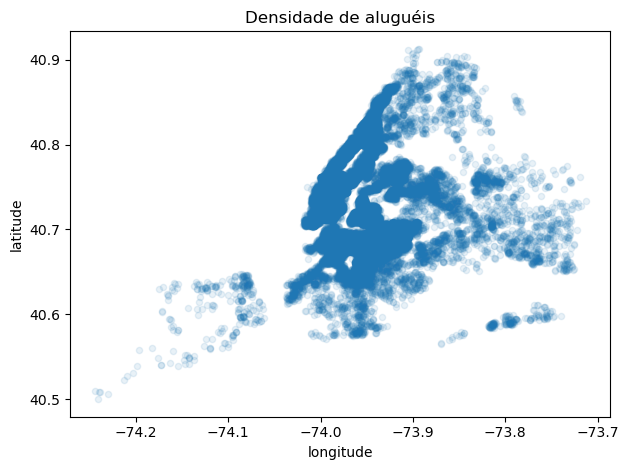

In [23]:
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.title('Densidade de aluguéis')
plt.xlabel('longitude')
plt.ylabel('latitude')
export_plot('geo_coord_den')

Como os valores do atributo 'price' são em uma gradeza maior que o restante dos atributos, colocou-se numa escala logaritmica para melhor visualização dos gráficos.

c:\Users\rafae\anaconda3\envs\machine_learn\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Exporting figure price_lon_lat


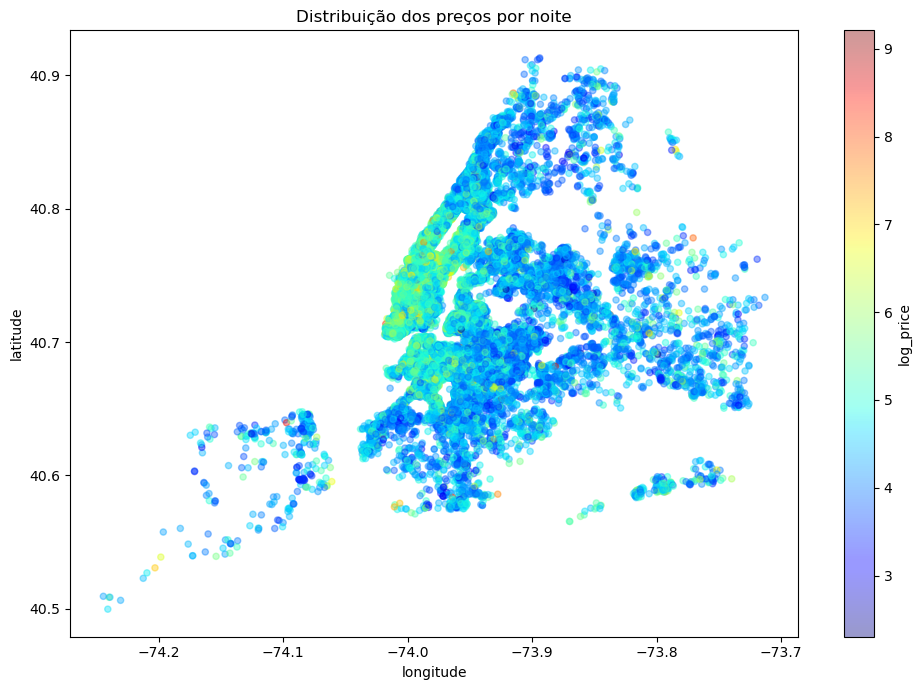

In [24]:
rent_data['log_price'] = np.log(rent_data['price'])
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(10,7), c='log_price', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.title('Distribuição dos preços por noite')
plt.xlabel('longitude')
plt.ylabel('latitude')
# plt.show()
export_plot('price_lon_lat')

Exporting figure rent_data_comparisson_lat_lon_bairro_group


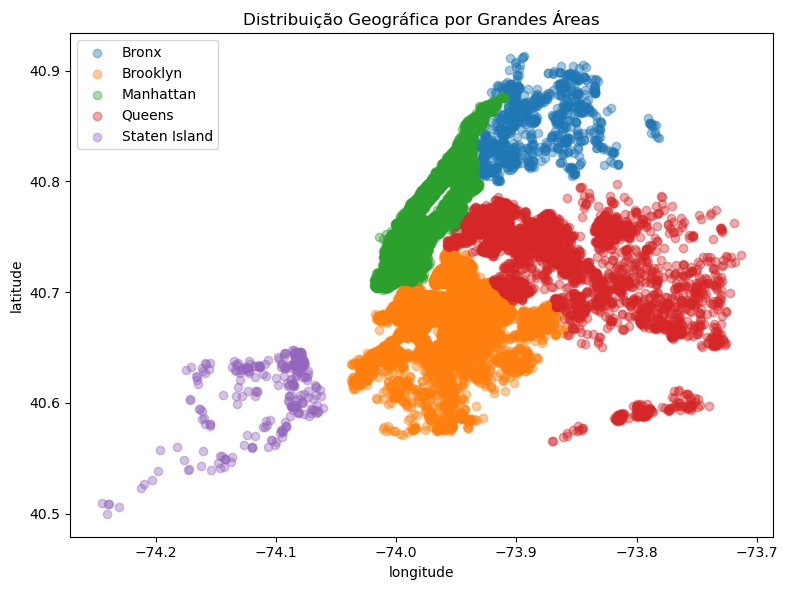

In [25]:
plt.figure(figsize=(8, 6))
for bairro, subset in rent_data.groupby('bairro_group'):
    plt.scatter(subset['longitude'], subset['latitude'], label=bairro, alpha=0.4)
plt.title('Distribuição Geográfica por Grandes Áreas')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
# plt.show()
export_plot('rent_data_comparisson_lat_lon_bairro_group')

Exporting figure qnt_ren_bairro


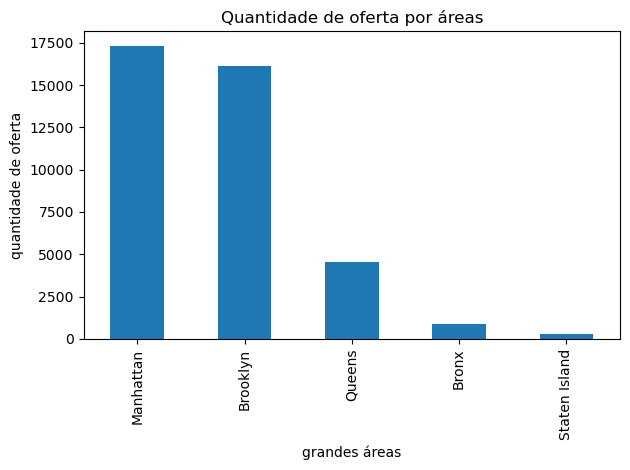

In [26]:
rent_data['bairro_group'].value_counts().plot(kind='bar')
plt.title('Quantidade de oferta por áreas')
plt.xlabel('grandes áreas')
plt.ylabel('quantidade de oferta')
export_plot('qnt_ren_bairro')

Exporting figure preco_por_bairro


C:\Users\rafae\AppData\Local\Temp\ipykernel_11072\2839595993.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


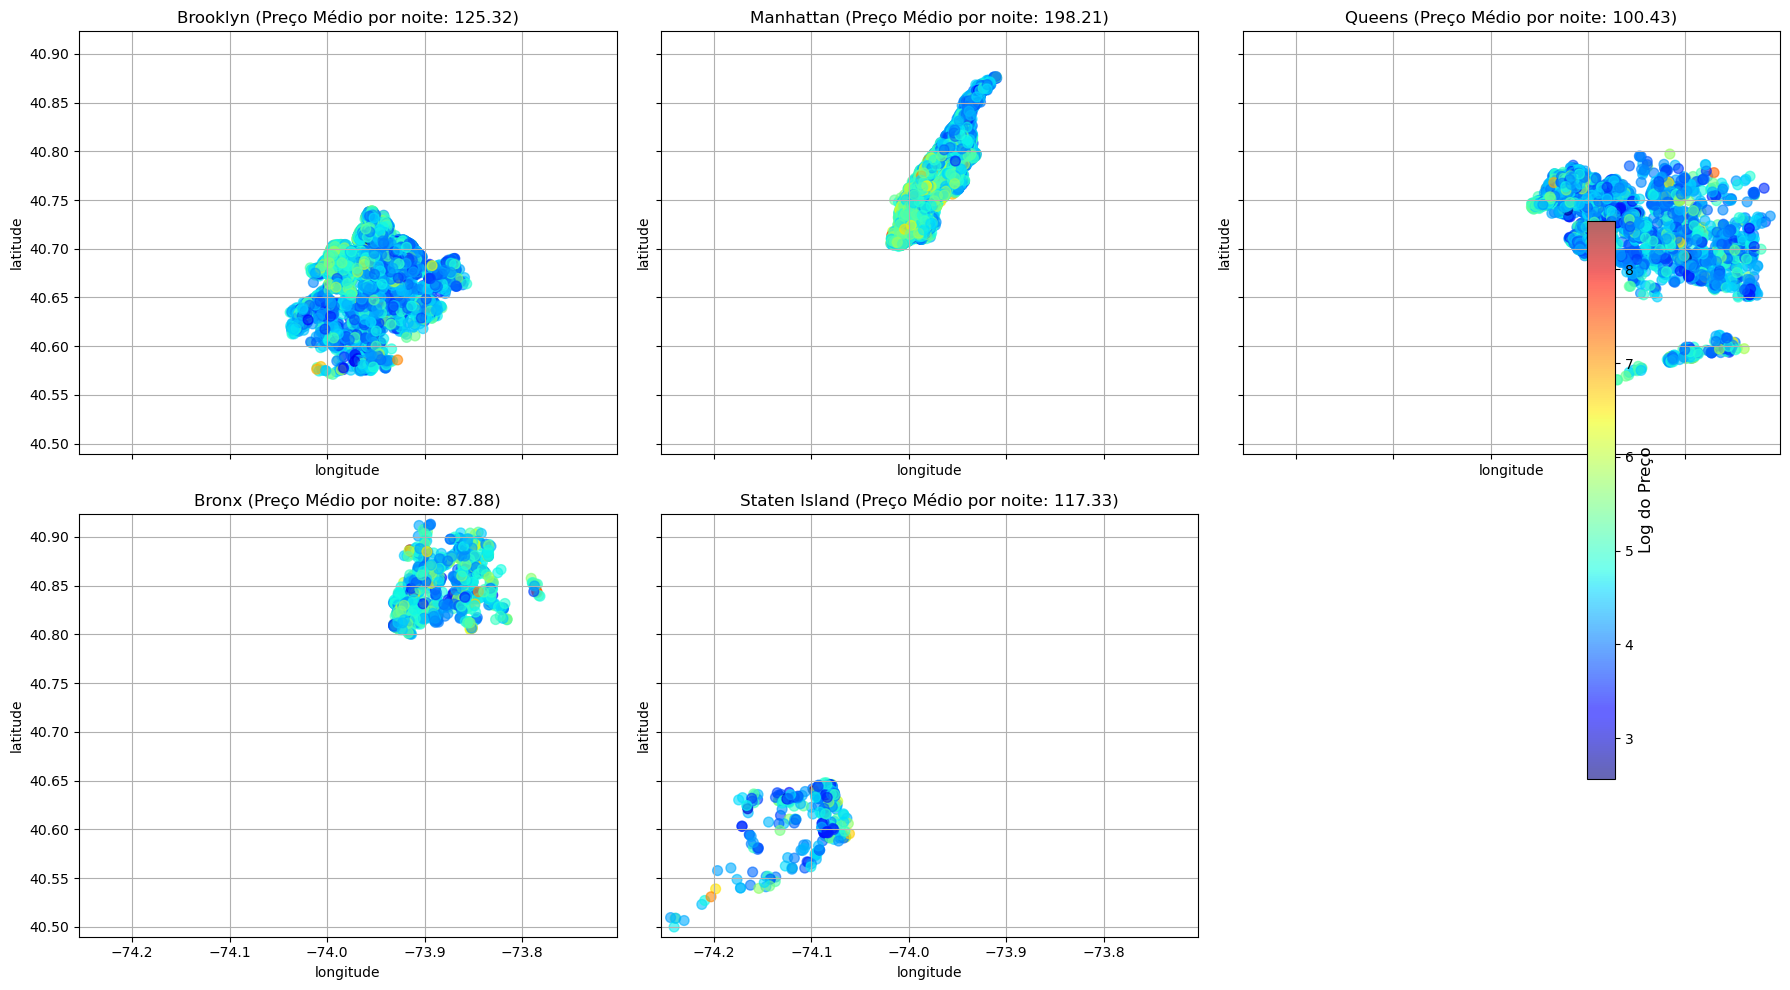

In [27]:
x_min, x_max = rent_data['longitude'].min() - 0.01, rent_data['longitude'].max() + 0.01
y_min, y_max = rent_data['latitude'].min() - 0.01, rent_data['latitude'].max() + 0.01


bairros = rent_data['bairro_group'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)

axes = axes.flatten() 
for ax, bairro in zip(axes, bairros):
    subset = rent_data[rent_data['bairro_group'] == bairro]
    scatter = ax.scatter(
        subset['longitude'],
        subset['latitude'],
        c=subset['log_price'],
        cmap=plt.get_cmap('jet'),
        alpha=0.6,
        s=50
    )
    ax.set_title(f'{bairro} (Preço Médio por noite: {subset['price'].mean():.2f})')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    ax.set_xlabel('longitude', fontsize=10)
    ax.set_ylabel('latitude', fontsize=10)

for ax in axes[len(bairros):]:
    ax.axis('off')


cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Log do Preço', fontsize=12)
# plt.show()

export_plot('preco_por_bairro')

Verifica-se que o atributo 'price' tem influência no atributo 'bairro_group'. Por exemplo, o grupo 'Manhattan' tem uma média média de preço maior.

Exporting figure preco_por_tipo_espaço


C:\Users\rafae\AppData\Local\Temp\ipykernel_11072\2839595993.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


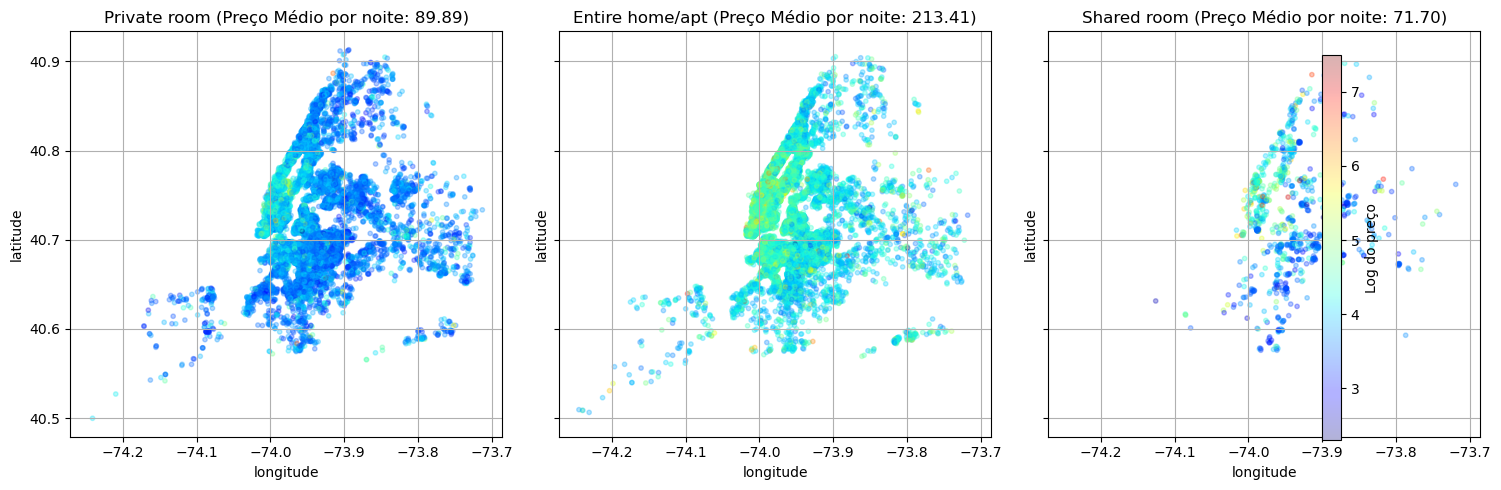

In [28]:
bairros = rent_data['room_type'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(bairros), figsize=(15, 5), sharex=True, sharey=True)


for ax, bairro in zip(axes, bairros):
    subset = rent_data[rent_data['room_type'] == bairro]
    scatter = ax.scatter(
        subset['longitude'],
        subset['latitude'],
        c=subset['log_price'],
        cmap=plt.get_cmap('jet'),  
        alpha=0.3,
        s=10
    )
    ax.set_title(f'{bairro} (Preço Médio por noite: {subset['price'].mean():.2f})')
    ax.set_xlabel('longitude', fontsize=10)
    ax.set_ylabel('latitude', fontsize=10)
    ax.grid(True)
    


cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Log do preço', fontsize=10)

# plt.show()

export_plot('preco_por_tipo_espaço')


Exporting figure qnt_ren_room


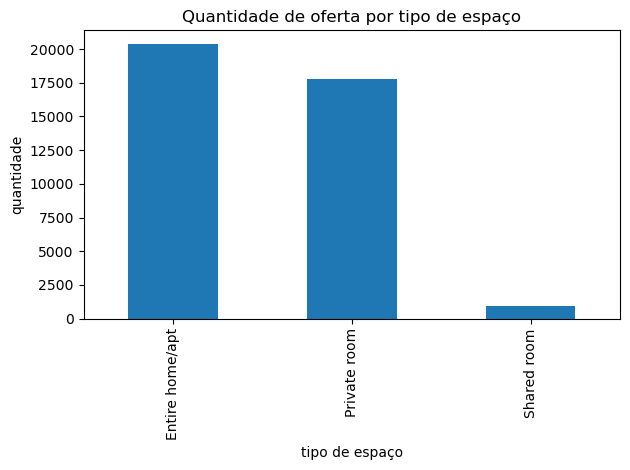

In [29]:
rent_data['room_type'].value_counts().plot(kind='bar')
plt.title('Quantidade de oferta por tipo de espaço')
plt.xlabel('tipo de espaço', fontsize=10)
plt.ylabel('quantidade', fontsize=10)
export_plot('qnt_ren_room')

Pelo gráfico acima, observa-se também que o preço varia de acordo com o tipo de espaço anunciado, sendo que quando um imóvel alugado em sua totalidade, o valor médio do aluguel é maior.

Exporting figure espaços_por_grupo_bairros


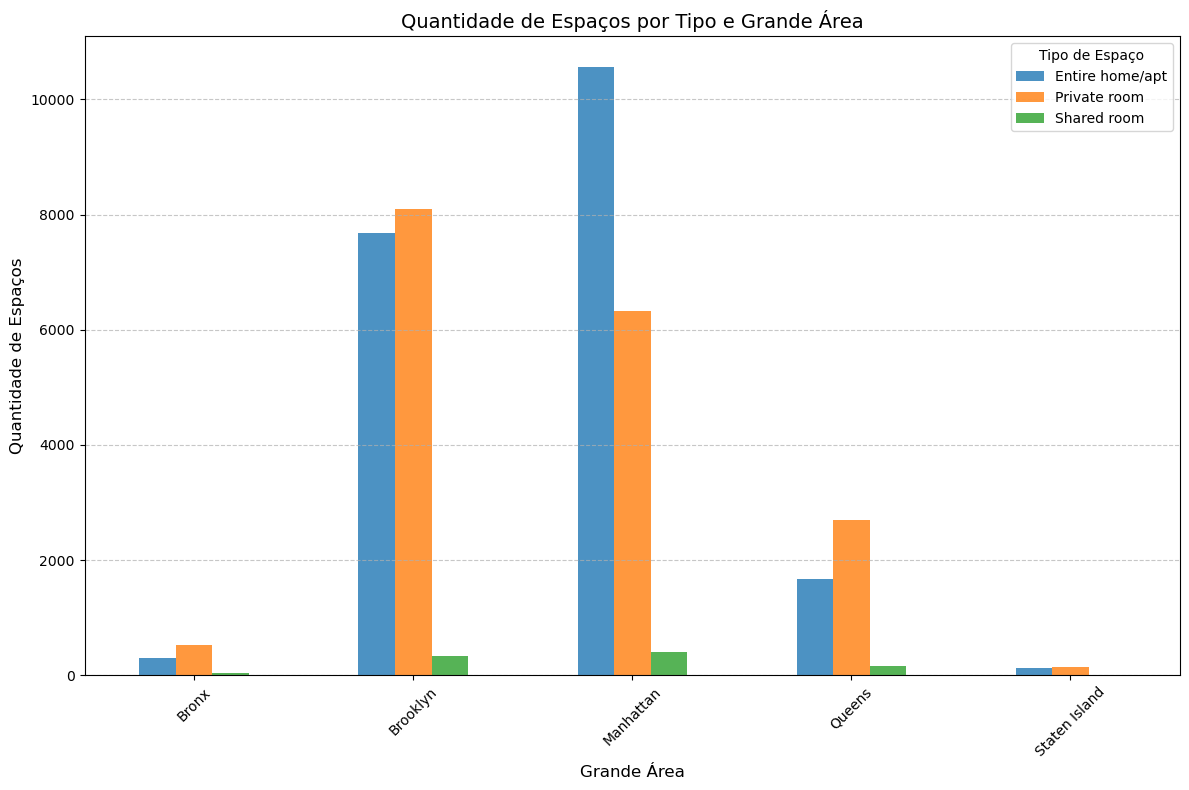

In [30]:
room_type_counts = rent_data.groupby(['bairro_group', 'room_type']).size().unstack()

room_type_counts.plot(kind='bar', figsize=(12, 8), alpha=0.8)

plt.title('Quantidade de Espaços por Tipo e Grande Área', fontsize=14)
plt.xlabel('Grande Área', fontsize=12)
plt.ylabel('Quantidade de Espaços', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Tipo de Espaço', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()
export_plot('espaços_por_grupo_bairros')

Exporting figure bairros_mais_populares


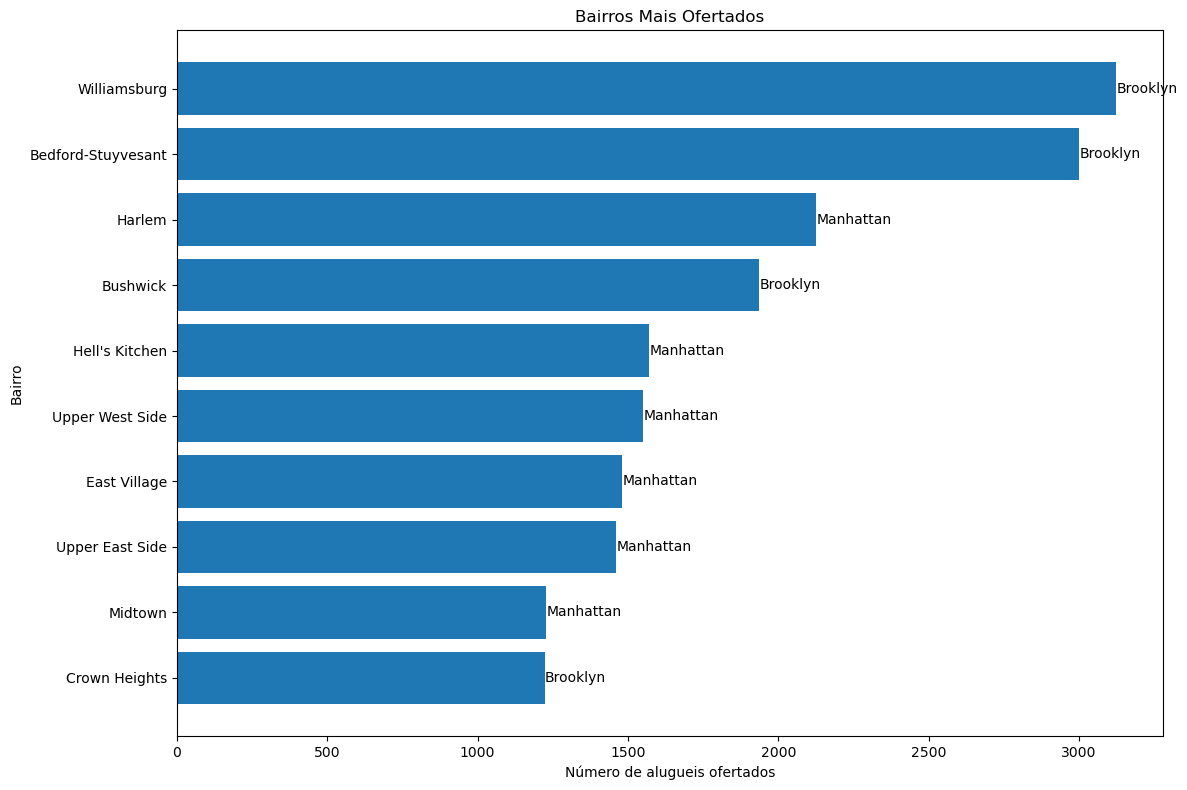

In [31]:
bairros_pops = rent_data['bairro'].value_counts()[:10]
plt.figure(figsize=(12, 8))

x = list(bairros_pops.index)
y = list(bairros_pops.values)
x.reverse()
y.reverse()


bairro_groups = [rent_data.loc[rent_data['bairro'] == bairro, 'bairro_group'].iloc[0] for bairro in x]


plt.title('Bairros Mais Ofertados')
plt.ylabel('Bairro')
plt.xlabel('Número de alugueis ofertados')
bars = plt.barh(x, y)


for bar, group in zip(bars, bairro_groups):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, group, va='center')

export_plot('bairros_mais_populares')


Observa-se que os bairros que possuem mais frequência de hospedagens estão entre as áreas de maiores médias de preços.

Exporting figure review_po_grandes_areas


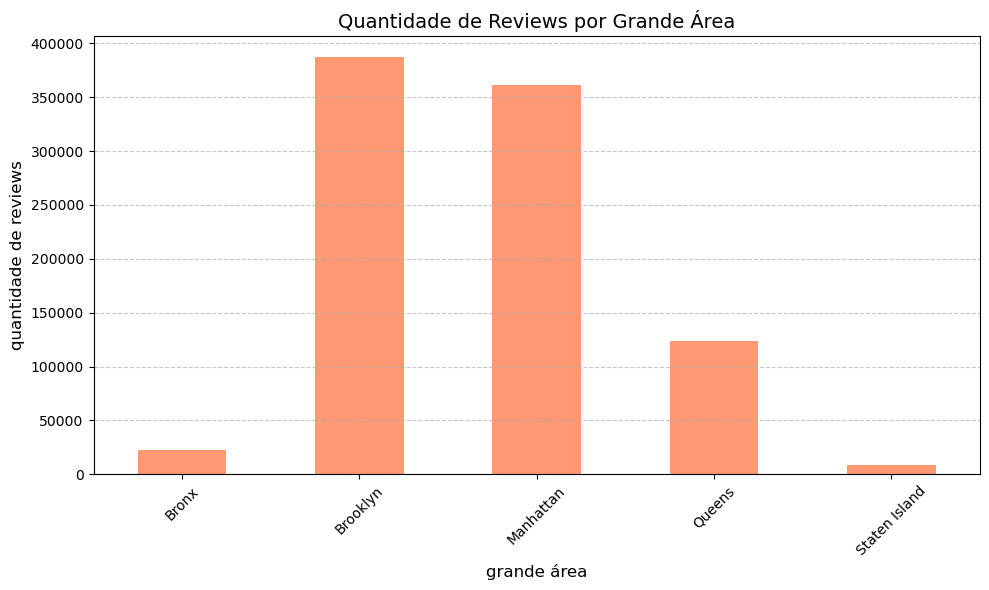

In [32]:
reviews_by_area = rent_data.groupby('bairro_group')['numero_de_reviews'].sum()

plt.figure(figsize=(10, 6))
reviews_by_area.plot(kind='bar', color='coral', alpha=0.8)

plt.title('Quantidade de Reviews por Grande Área', fontsize=14)
plt.xlabel('grande área', fontsize=12)
plt.ylabel('quantidade de reviews', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

export_plot('review_po_grandes_areas')


Exporting figure minimo_noite_preco


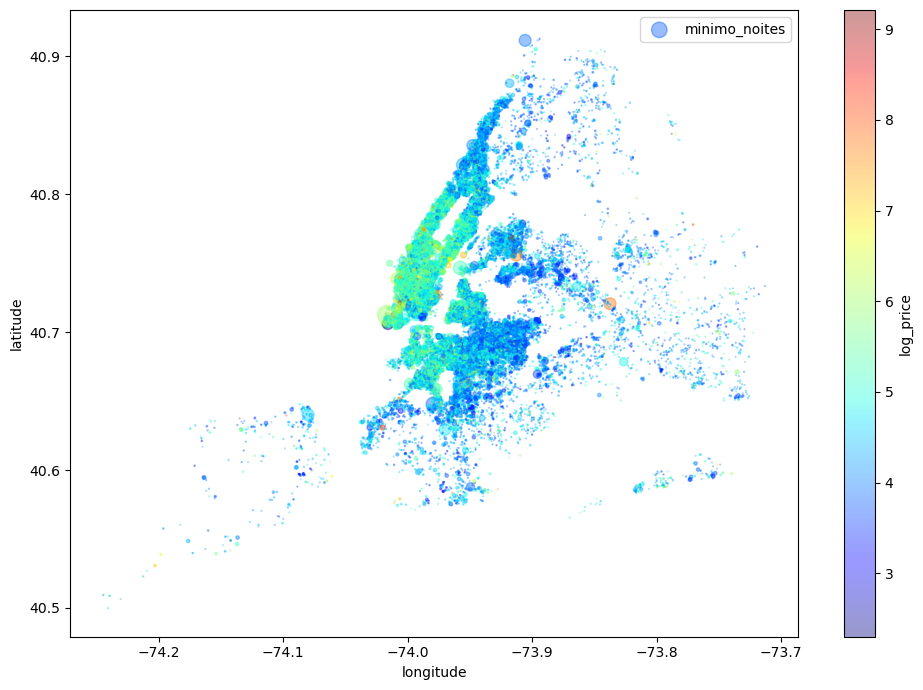

In [33]:
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=rent_data['minimo_noites']/5, label='minimo_noites', figsize=(10,7),
             c='log_price', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
# plt.show()
export_plot('minimo_noite_preco')

Exporting figure numero_reviews_preco


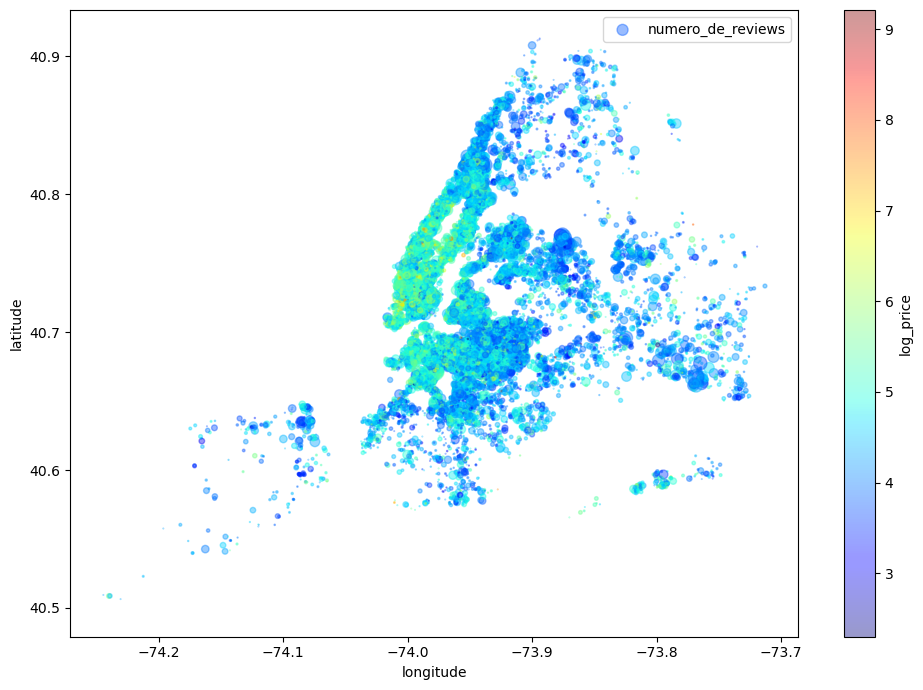

In [34]:
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=rent_data['numero_de_reviews']/5, label='numero_de_reviews', figsize=(10,7),
             c='log_price', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
# plt.show()
export_plot('numero_reviews_preco')

Exporting figure reviews_por_mes_preco


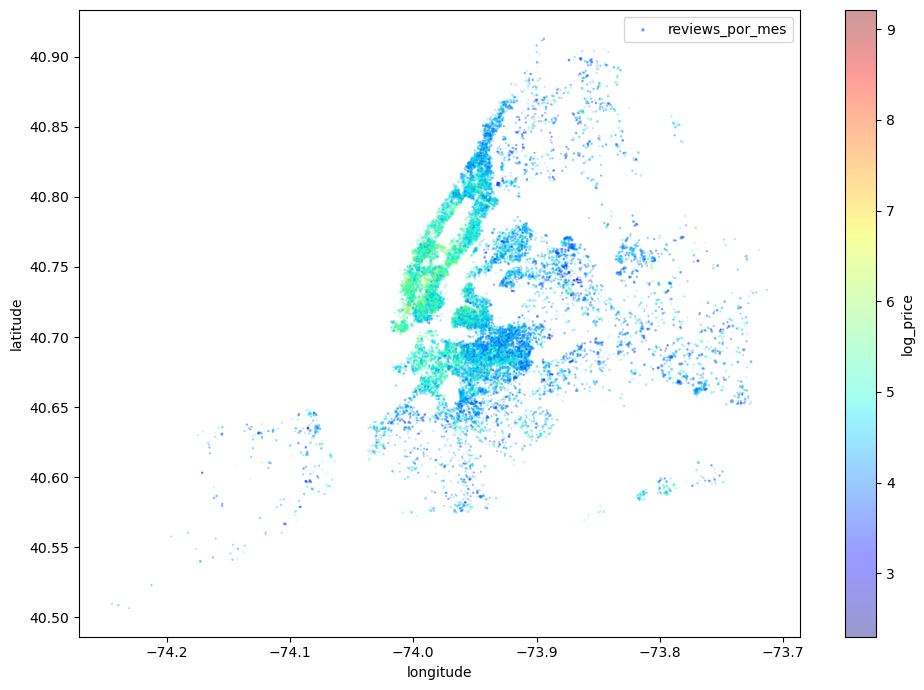

In [35]:
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=rent_data['reviews_por_mes']/5, label='reviews_por_mes', figsize=(10,7),
             c='log_price', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
# plt.show()

export_plot('reviews_por_mes_preco')

Exporting figure disponilidade_preco


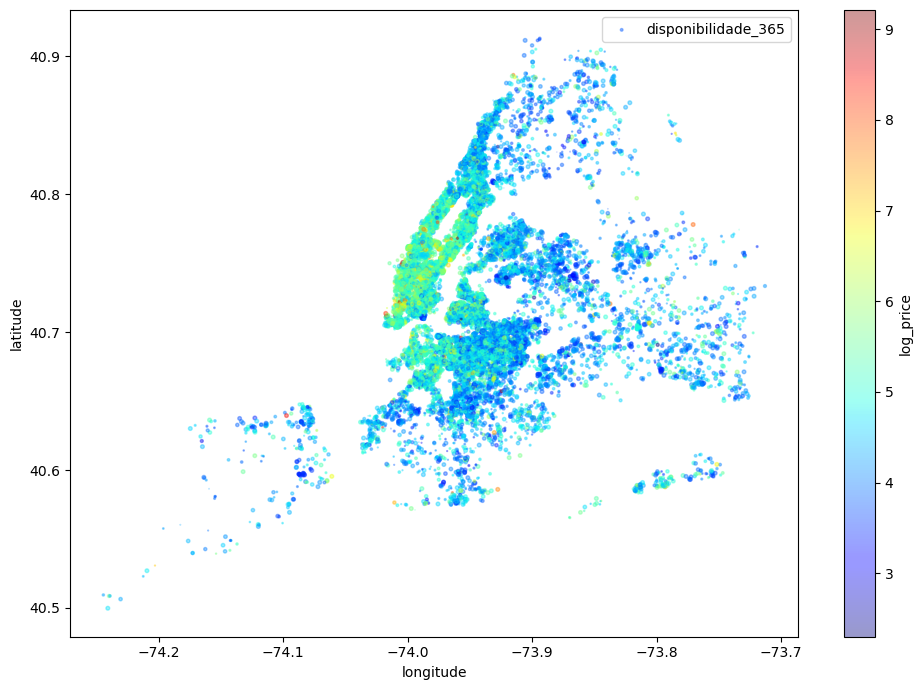

In [36]:
rent_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=rent_data['disponibilidade_365']/50, label='disponibilidade_365', figsize=(10,7),
             c='log_price', cmap=plt.get_cmap('jet'), colorbar=True,
             sharex=False)
plt.legend()
# plt.show()
export_plot('disponilidade_preco')

Exporting figure maiores_host_preco


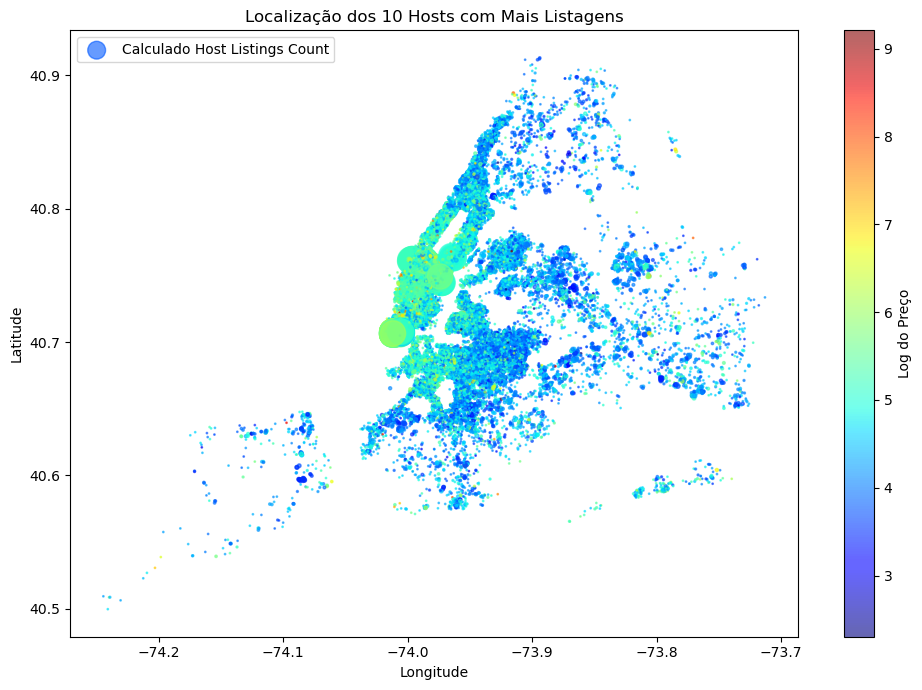

In [37]:
top_hosts = rent_data['calculado_host_listings_count'].value_counts().head(10).index

top_hosts_data = rent_data[rent_data['calculado_host_listings_count'].isin(top_hosts)]


plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    top_hosts_data['longitude'], 
    top_hosts_data['latitude'], 
    alpha=0.6, 
    s=top_hosts_data['calculado_host_listings_count'],
    c=top_hosts_data['log_price'],
    cmap=plt.get_cmap('jet')
)

plt.colorbar(scatter, label='Log do Preço')
plt.title('Localização dos 10 Hosts com Mais Listagens')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Calculado Host Listings Count'])
plt.tight_layout()
# plt.show()

export_plot('maiores_host_preco')


A partir dos gráficos acima, pode-se resumir as relações assim:
*   a concentração de espaços ofertados estão na regiao central, podendo aumentar a concorrência;
*   a concentração dos preços por noite mais elevados estão nos bairros da regiao central;
*   predominancia de ofertas nos grupos de Manhattan e Brooklyn;
*   quanto mais central a oferta (grupos Manhattan e Brooklyn), maior a faixa do preços por noite;
*   quando oferta-se o espaço inteiro, o preço médio é quase o triplo do preço quando se compartilha o espaço. Ainda, observa-se que, a quantidade de alugueis oferecidos por quarto privado e todo o apartamento são em maioria.
*   tem-se que na grande área Manharran, ocorre a oferta de mais alugueis pelo espaço todo, ao ponto de que no brooklyn, apenas o alugel de quartos divididos é baixo, comparado aos outros espaços;
*   os bairros mais populares ofertados são do Brookly e Manhattan, estes possuindo a maior quantidade de reviews.

In [38]:
rent_data.drop('log_price', axis=1, inplace=True)

## 2.6 - Correlação ente atributos

In [39]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39115 entries, 17944 to 15857
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             39115 non-null  int64  
 1   host_id                        39115 non-null  int64  
 2   bairro_group                   39115 non-null  object 
 3   bairro                         39115 non-null  object 
 4   latitude                       39115 non-null  float64
 5   longitude                      39115 non-null  float64
 6   room_type                      39115 non-null  object 
 7   price                          39115 non-null  int64  
 8   minimo_noites                  39115 non-null  int64  
 9   numero_de_reviews              39115 non-null  int64  
 10  reviews_por_mes                31054 non-null  float64
 11  calculado_host_listings_count  39115 non-null  int64  
 12  disponibilidade_365            39115 non-null  

Para realizar a correlação entre os atributos, necessita-se separar de atributos numéricos e atributos textuais ou categóricos.

In [40]:
rent_data_num = rent_data.copy()
rent_data_alf = rent_data.copy()
for atributo in rent_data:
    # print(rent_data_num[atributo].dtypes)
    if (rent_data[atributo].dtypes==int or rent_data[atributo].dtypes==float):
        rent_data_alf.drop(atributo, axis=1, inplace=True)
    else:
        rent_data_num.drop(atributo, axis=1, inplace=True)

Nesse momento, para verificar também correlações entre os atributos textuais 'bairro_group' e 'room_type', alteraremos seus dados para tipo numérico.

Exporting figure correlation_matrix


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365'],
      dtype='object')

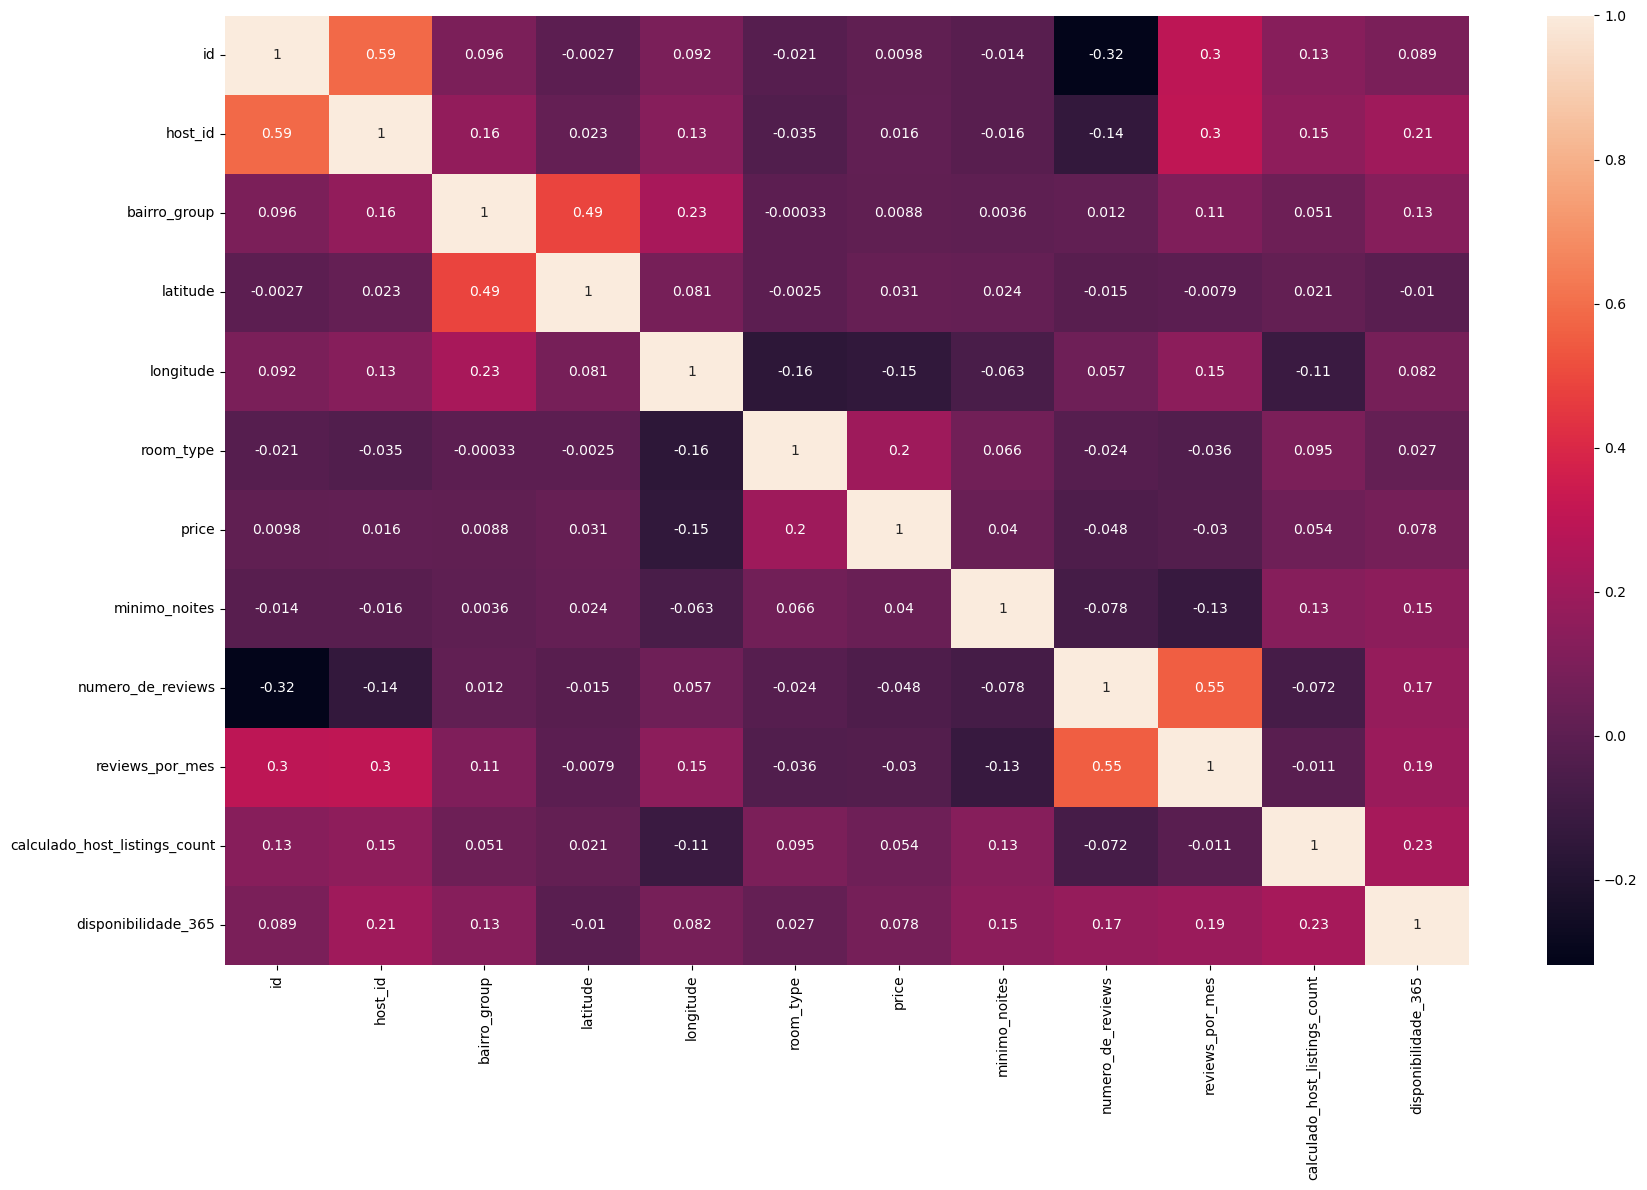

In [41]:
def codify(data):
    for column in data.columns[data.columns.isin(['bairro_group', 'room_type'])]:
        data[column] = data[column].factorize()[0]
    return data

rent_data_codificado = codify(rent_data.copy())
rent_data_codificado.drop('bairro', axis=1, inplace=True)
correlation = rent_data_codificado.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation, annot=True)
export_plot('correlation_matrix')
rent_data_num.columns

Observa-se correlações fracas entre o atributo 'price' e outros atributos, o que pode indicar uma correlação não-linear entre esses atributos.


# 3. Preparação dos Dados

Nesta etapa, precisa-se retirar dos conjuntos de dados de treinamento ('strat_train_data) o atributo alvo ('price'), tratar os valores ainda nulos nos dados de treinamento, tratar os atributos com valores textuais e escalonar os atributos numéricos.

Iremos também retirar o atributo 'bairro', já que observou-se que as grandes áreas possuem maior relevância.


Para os valores nulos, iremos preenchê-los com a média dos valores do atributo. E para valores textuais, devemos transformá-los em valores numéricos. Essa transformação será realizada com a técnica one-hot, já que assim evita-se criar valores que indiquem uma crescente para o modelo. O escalonamento dos valores é necessário para colocá-los dentro de um padrão, evitando tendências no modelo, e será feito por meio da padronização.

E, como precisamos fazer essa alterações num mesmo conjunto e em uma determinada ordem, será utilizado pipeline para a automatização desses passos.


In [42]:
del rent_data
rent_data = strat_train_data.drop('price', axis=1)
rent_data.drop('bairro', axis=1, inplace=True)
rent_data_price = strat_train_data['price'].copy()

median_reviews_m = rent_data['reviews_por_mes'].mean()

In [43]:
rent_data_num = rent_data.copy()
rent_data_alf = rent_data.copy()
for atributo in rent_data:
    if (rent_data[atributo].dtypes==int or rent_data[atributo].dtypes==float):
        rent_data_alf.drop(atributo, axis=1, inplace=True)
    else:
        rent_data_num.drop(atributo, axis=1, inplace=True)

In [44]:
numerical_pipeline = Pipeline([
        ('nan_imputer', SimpleImputer(strategy='median')),
        ('stand_scaling', StandardScaler()),
    ])

complete_pipe = ColumnTransformer([
                ('numerical', numerical_pipeline, list(rent_data_num)),
                ('text', OneHotEncoder(), list(rent_data_alf)),
])

rent_data_ready = complete_pipe.fit_transform(rent_data)



In [45]:
rent_data_ready

array([[-0.45116233,  0.21564773, -2.60570143, ...,  0.        ,
         1.        ,  0.        ],
       [-0.83061365, -0.75451346, -0.19634156, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84676246, -0.59432433,  2.1276307 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.71281834, -0.84607382, -0.05983132, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.38081383, -0.83128706,  0.48254492, ...,  1.        ,
         0.        ,  0.        ],
       [-0.56300444, -0.49769792, -0.89959832, ...,  1.        ,
         0.        ,  0.        ]], shape=(39115, 17))

# 4. Modelagem

## 4.1 - Escolha do modelo

Neste momento vamos optar por três modelos de aprendizagem para verificar qual possui melhor desempenho, além de pontuar as métricas de avaliação de cada modelo. Para este trabalho, iremos utilizar o erro médio absoluto (MAE), erro médio quadrático (MSE), raiz quadrada do erro médio quadrático (RMSE), coeficiente de determinação (R2) e validação cruzada, método em que se cria subconjuntos para o treinamento e avaliação do modelo para cada subconjunto gerado. Este último método irá retornar o RMSE para cada subconjunto gerado, sua média e o desvio padrão.

In [46]:

def print_evaluate(true, predicted):
    ''' Função que recebe o conjunto de dados de teste e o conjunto de 
    dados preditos por um modelo de aprendizado, calcula métricas para avaliar o seu desempenho do modelo criado
    e printa as métricas calculadas.

    Input:
    
    true        -> pandas.Series
    predicted   -> numpy.ndarray
    
    Output:
    
    None
    '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [47]:
def print_scores(scores):
    '''Função recebe valores de RMSE, calcula sua média e o seu desvio padrão, printando-os em seguida.
    
    Input:

    scores -> numpy.ndarray

    Output:

    None
    '''
    print('RMSE para cada grupo:', scores)
    print('Média do RMSE:', scores.mean())
    print('Desvio padrão:', scores.std())

In [48]:
X_train, X_test, y_train, y_test = train_test_split(rent_data_ready, rent_data_price, test_size=0.3, random_state=42)

> Regressão Linear

In [49]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict_lin=lin_reg.predict(X_test)

> Ávore de Decisão

In [50]:
dtree_reg=DecisionTreeRegressor()
dtree_reg.fit(X_train,y_train)
y_predict_dtree=dtree_reg.predict(X_test)

> Floresta Aleatória

In [51]:
rforest_reg = RandomForestRegressor(random_state=42)
rforest_reg.fit(X_train,y_train)
y_predict_rforest = rforest_reg.predict(X_test)

In [52]:
print('Métricas calculadas')
print('--------------------------')
print('Regressão Linear')
print_evaluate(y_test,y_predict_lin)
print('--------------------------')
print('Árvore de Decisão')
print_evaluate(y_test,y_predict_dtree)
print('--------------------------')
print('Floresta Aleatória')
print_evaluate(y_test,y_predict_rforest)

Métricas calculadas
--------------------------
Regressão Linear
MAE: 75.77702190646292
MSE: 71285.32046698799
RMSE: 266.993109399827
R2 Square 0.08013574872542018
--------------------------
Árvore de Decisão
MAE: 90.1973583297827
MSE: 104615.7728163613
RMSE: 323.4436161317167
R2 Square -0.34995969580860087
--------------------------
Floresta Aleatória
MAE: 67.56302002556455
MSE: 66319.59268490839
RMSE: 257.52590682280567
R2 Square 0.1442133938615091


Os valores acima mostram que o pior modelo entre os três é a Árvore de Decisão, principalmente por conta do R2 que é negativo. Ente Regressão Linear e Floresta Aleatória, além do R2 do último ser o mais próximo de 1, as outras métricas são as menores, indicando que as não linearidades dos dados foram tratadas adequadamente, como é próprio deste modelo.

> Validação Cruzada

In [53]:
linear_scores = cross_val_score(lin_reg, rent_data_ready, rent_data_price,
                                scoring='neg_mean_squared_error', cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)

In [54]:
dtree_scores = cross_val_score(dtree_reg, rent_data_ready, rent_data_price,
                                scoring='neg_mean_squared_error', cv=10)
dtree_rmse_scores = np.sqrt(-dtree_scores)

In [55]:
rforest_scores = cross_val_score(rforest_reg, rent_data_ready, rent_data_price,
                                scoring='neg_mean_squared_error', cv=10)
rforest_rmse_scores = np.sqrt(-rforest_scores)

In [56]:
print('Validação Cruzada calculadas')
print('--------------------------')
print('Regressão Linear')
print_scores(linear_rmse_scores)
print('--------------------------')
print('Árvore de decisão')
print_scores(dtree_rmse_scores)
print('--------------------------')
print('Floresta Aleatória')
print_scores(rforest_rmse_scores)

Validação Cruzada calculadas
--------------------------
Regressão Linear
RMSE para cada grupo: [276.40830725 212.43591033 183.49722394 252.21979402 199.11009622
 241.84692413 337.440518   219.28114345 249.32497097 174.95972293]
Média do RMSE: 234.65246112504033
Desvio padrão: 45.88875992477826
--------------------------
Árvore de decisão
RMSE para cada grupo: [354.03786747 299.69865787 272.18706493 306.83698327 317.95152587
 281.88651196 380.55455538 285.76500118 329.01343117 340.55349498]
Média do RMSE: 316.84850940975076
Desvio padrão: 32.75691589745919
--------------------------
Floresta Aleatória
RMSE para cada grupo: [285.88649989 224.64820261 177.75379715 199.79311706 203.79655847
 232.20188016 313.26333696 208.53932724 249.4576378  177.61928066]
Média do RMSE: 227.29596379951113
Desvio padrão: 42.34158450694322


Observando os dados acima, apesar de ter um menor desvio padrão, a Árvore de decisão possui valores elevados de RMSE, indicando maior erro entre os dados de treinamento e teste. Já entre os outros dois modelos, Floresta Aleatória também se saiu melhor, principalmente em relação ao RMSE e sua média.

A partir desses dados, escolhe-se Floresta Aleatória para ser o modelo de regressão. Os valores das métricas mostram que o modelo consegue se adequar às não linearidades dos dados, característica que os outros dois modelos não conseguiram acompanhar.

## 4.2 - Ajuste fino do modelo escolhido

Com a função 'GridSearchCV', iremos realizar o cálculo dos melhores hiperparâmetros do modelo de Floresta Aleatória e utilizar esses melhores no modelo para oconjunto de teste.

In [57]:

fine_parameters = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rforest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rforest_reg, fine_parameters, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(rent_data_ready, rent_data_price)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

Assim, usaremos esses valores encontrados nos hiperparâmetros do modelo.

In [58]:
final_rforest_reg = grid_search.best_estimator_

## 4.3 - Aplicação do modelo nos dados de teste

In [59]:
y_test_final = strat_test_data["price"].copy()
X_test_final = strat_test_data.drop(['bairro','price'], axis=1)


X_test_prepared = complete_pipe.transform(X_test_final)
final_predi = final_rforest_reg.predict(X_test_prepared)

In [60]:
print('Métricas calculadas')
print('--------------------------')
print('Floresta Aleatória')
print_evaluate(y_test_final,final_predi)

Métricas calculadas
--------------------------
Floresta Aleatória
MAE: 61.147230459828876
MSE: 30493.856289895586
RMSE: 174.62490168900766
R2 Square 0.1674984804916363


# 5. Salvando o Modelo Criado

In [61]:
modelo_final = Pipeline([
    ('construction', complete_pipe),
    ('rflorest', final_rforest_reg)
])
joblib.dump(modelo_final, "modelo_final.pkl")


['modelo_final.pkl']